In [1]:
from poly_torch import PolynomialLayer
import torch
import torch.nn as nn
import numpy as np
from torch.nn.modules import Module
from torch._jit_internal import weak_module, weak_script_method
from torch.nn.parameter import Parameter
from torch.nn.modules.linear import init
from math import sqrt
import torch.nn.functional as F
import torch.optim
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

initialisation of the target polynomial : target_polynomial is X^2 + 2 X + 1

In [2]:
target_polynomial = PolynomialLayer(degree=2,inp_size=1, out_size=1)

target_polynomial.coeff_deg_0 = Parameter(torch.tensor([1.0]))
target_polynomial.coeff_deg_1 = Parameter(torch.tensor([2.0]))
target_polynomial.coeff_deg_2 = Parameter(torch.tensor([1.0]))


we will fit the nn poly, consisting of a single polynomial layer :

In [3]:
poly = PolynomialLayer(degree=2, inp_size=1, out_size=1)

Let's build our training data. In order to simulate real conditions, we add random errors to the outputs of target_polynomial.

In [4]:
training = []

for i in range(10000):
    v = torch.rand(1)
    training.append((v, target_polynomial(v) + torch.rand(1)))

We define a basic recipy to run a training, then we use it to fit poly :

In [5]:
def train(model, training, optimizer):
    """ fits the (torch) neural network model to the data contained in training, with a progression bar
    
    Parameters:
        model : torch.nn.modules.Module
            the nn we wish to train
        training : list of pairs (input : tensor, expected : tensor)
            the data used to train the nn
        optimizer : torch.optim.adam or torch.optim.SGD
    """ 
    model.train()
    for batch_idx, (data, target) in tqdm(enumerate(training), total=len(training)):
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.MSELoss()
        tmenik = loss(output, target)
        tmenik.backward(retain_graph=True)
        optimizer.step()

In [9]:
train(poly, training, optimizer=torch.optim.SGD(poly.parameters(), lr=0.1)) 

We now plot a scatter view of our training data (in blue), and the prediction made by the nn poly (in red) :

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


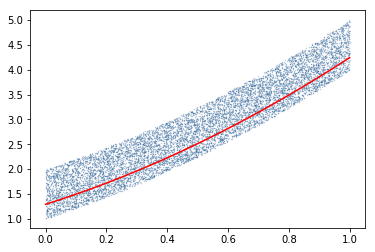

In [7]:
training_x = [x.item() for (x,y) in training]
training_y = [y.item() for (x,y) in training]
t = np.linspace(0,1,1000)
network_predictions = [poly(torch.tensor([x])) for x in t]
plt.scatter(training_x,training_y,s=0.1,c=(0.2,0.4,0.6,0.5)) #a scatter view of our training set
plt.plot(t,network_predictions,'r')
plt.show()

In [8]:
[p.item() for p in poly.parameters()]

[1.2914236783981323, 1.9297926425933838, 1.0248064994812012]

In [10]:
[p.item() for p in poly.parameters()]

[1.2907211780548096, 1.9331613779067993, 1.0215051174163818]